#### DATA ANALYSIS USING SQL

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
database = 'database.sqlite'

###### Creating a connection to DB

In [3]:
conn = sqlite3.connect(database)

In [5]:
tables = pd.read_sql("""SELECT * 
                        FROM sqlite_master
                        WHERE type = 'table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


###### Let's explore our database

In [7]:
countries = pd.read_sql("""SELECT * FROM Country;""", conn)
countries 

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [12]:
print("There are " + str(countries['name'].nunique()) + " countries in the country table.")

There are 11 countries in the country table.


###### Let's have a look at the various leagues played in each country.

In [18]:
league = pd.read_sql("""SELECT l.country_id, l.name league_name, c.name country_name 
                        FROM League l
                        JOIN Country c
                        ON l.country_id = c.id;""", conn)
league

,country_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [31]:
print("There are " + str(league['league_name'].nunique()) + " leagues played by all countries.")

There are 11 leagues played by all countries.


###### A look at the teams in all countries.

In [19]:
teams = pd.read_sql("""SELECT * 
                        FROM Team;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [32]:
print("There are " + str(teams['team_long_name'].nunique()) + " teams in the database.")

There are 296 teams in the database.


In [27]:
matches = pd.read_sql("""SELECT * FROM Match
                        LIMIT 10;""", conn)
matches 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


###### Details of some matches played in Spain

In [29]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal 
                                        FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date DESC
                                LIMIT 10;
""", conn)
detailed_matches 

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24490,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Sporting de Gijón,Villarreal CF,2,0
1,24491,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Real Betis Balompié,Getafe CF,2,1
2,24492,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,RCD Espanyol,SD Eibar,4,2
3,24495,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Málaga CF,UD Las Palmas,4,1
4,24497,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-15 00:00:00,Rayo Vallecano,Levante UD,3,1
5,24489,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-14 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,0,2
6,24493,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-14 00:00:00,Granada CF,FC Barcelona,0,3
7,24494,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-14 00:00:00,Athletic Club de Bilbao,Sevilla FC,3,1
8,24496,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-14 00:00:00,Atlético Madrid,RC Celta de Vigo,2,0
9,24488,Spain,Spain LIGA BBVA,2015/2016,38,2016-05-13 00:00:00,Valencia CF,Real Sociedad,0,1


##### Some Analysis 

In [38]:
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leagues_by_season 

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


###### A plot of the average goals scored in each league per season.

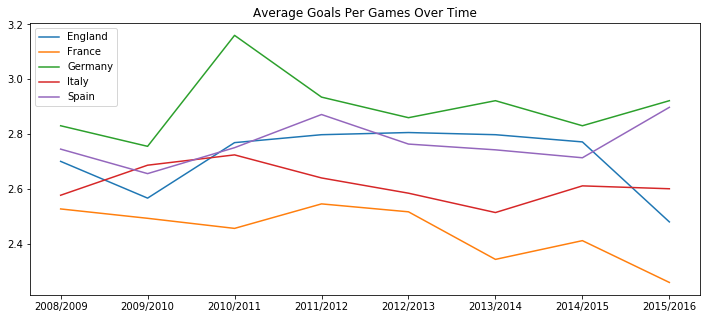

In [41]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()), 
                  columns = leagues_by_season['country_name'].unique())
df.loc[:, 'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany', 'avg_goals'])
df.loc[:, 'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain', 'avg_goals'])
df.loc[:, 'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France', 'avg_goals'])
df.loc[:, 'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England', 'avg_goals'])
df.loc[:, 'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy', 'avg_goals'])

df.plot(figsize = (12,5), title = 'Average Goals Per Games Over Time')

###### A plot of the average goal difference scored in each league per season.

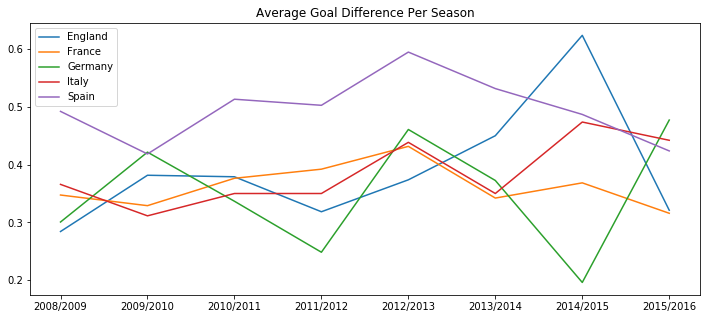

In [42]:
df = pd.DataFrame(index = np.sort(leagues_by_season['season'].unique()), 
                 columns = leagues_by_season['country_name'].unique())
df.loc[:, 'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Germany', 'avg_goal_dif'])
df.loc[:, 'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Spain', 'avg_goal_dif'])
df.loc[:, 'France'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'France', 'avg_goal_dif'])
df.loc[:, 'England'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'England', 'avg_goal_dif'])
df.loc[:, 'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name'] == 'Italy', 'avg_goal_dif'])

df.plot(figsize = (12,5), title = 'Average Goal Difference Per Season')

###### Average height and weight of players.

In [44]:
players_height = pd.read_sql("""SELECT CASE 
                                    WHEN ROUND(height) < 165 THEN 165
                                    WHEN ROUND(height) > 195 THEN 195
                                    ELSE ROUND(height) END AS calc_height,
                                   COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                              FROM PLAYER
                              LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height""", conn)
players_height


,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


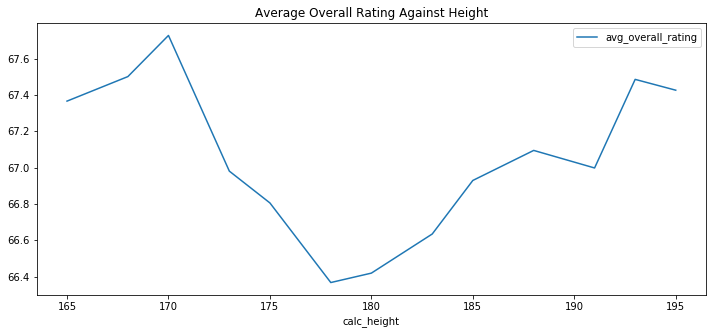

In [46]:
players_height.plot(x = 'calc_height', y = 'avg_overall_rating', figsize = (12, 5), title = 'Average Overall Rating Against Height')